# 1. Ask an interesting question

1. Delay binary classifier (yes/no, >15 min)
- Better isolate the key features to predict delays so that airlines focus their efforts on their weakest points
- Account for uncontrollable variables (e.g. unpredicted adverse weather) and prepare to act consequently
2. Additional questions:
- When is the best time of day/day of week/time of year to fly to minimize delays?
- Do older planes suffer more delays?
- How does the number of people flying between different locations change over time?
- How well does weather predict plane delays?
- Can you detect cascading failures as delays in one airport create delays in others? Are there critical links in the system?”

___

# 2. Get the data

### On-Time : Reporting Carrier On-Time Performance (1987-present)

Source: https://www.transtats.bts.gov/DatabaseInfo.asp?DB_ID=120&DB_URL=Mode_ID=1&Mode_Desc=Aviation&Subject_ID2=0

<em>Note</em>: Over time both the code and the name of a carrier may change and the same code or name may be assumed by a different airline. To ensure that you are analyzing data from the same airline, TranStats provides four airline-specific variables that identify one and only one carrier or its entity: Airline ID (AirlineID), Unique Carrier Code (UniqueCarrier), Unique Carrier Name (UniqueCarrierName), and Unique Entity (UniqCarrierEntity). A unique airline (carrier) is defined as one holding and reporting under the same DOT certificate regardless of its Code, Name, or holding company/corporation. US Airways and America West started to report combined on-time data in January 2006 and combined traffic and financial data in October 2007 following their 2005 merger announcement. Delta and Northwest began reporting jointly in January 2010 following their 2008 merger announcement. Continental Micronesia was combined into Continental Airlines in December 2010 and joint reporting began in January 2011. Atlantic Southeast and ExpressJet began reporting jointly in January 2012. United and Continental began reporting jointly in January 2012 following their 2010 merger announcement. Endeavor (9E) operated as Pinnacle prior to August 2013. Envoy (MQ) operated as American Eagle prior to April 2014. Southwest (WN) and AirTran (FL) began reporting jointly in January 2015 following their 2011 merger announcement. American (AA) and US Airways (US) began reporting jointly as AA in July 2015 following their 2013 merger announcement. Alaska (AS) and Virgin America (VX) began reporting jointly as AS in April 2018 following their 2016 merger announcement.

        
- **AC_Types**:
    - **Summary**:
        - Reporting Carrier On-Time Performance (1987-present)
    - **Description**:
        - Reporting carriers are required to (or voluntarily) report on-time data for flights they operate: on-time arrival and departure data for non-stop domestic flights by month and year, by carrier and by origin and destination airport. Includes scheduled and actual departure and arrival times, canceled and diverted flights, taxi-out and taxi-in times, causes of delay and cancellation, air time, and non-stop distance. Use Download for individual flight data.
    - **File**:
        - YYMM_123456789_T_ONTIME_REPORTING.zip *(YY = Year ; MM = Month)*

In [1]:
# Import libraries to be used

# Warning messages display
## import warnings
## warnings.filterwarnings(action='ignore') # https://docs.python.org/3/library/warnings.html#the-warnings-filter

# Directories/Files management
import os.path
## from zipfile import ZipFile # De momento no ha hecho falta 

# Data analysis and wrangling
import pandas as pd
import numpy as np
pd.set_option('display.max_columns', None) # Show all columns in DataFrames
## pd.set_option('display.max_rows', None) # It greatly slows down the output display and freezes the kernel

# Visualization
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
plt.style.use('ggplot') # choose a style: 'plt.style.available'
sns.set_theme(context='notebook',
              style="darkgrid") # {darkgrid, whitegrid, dark, white, ticks}
palette = sns.color_palette("flare", as_cmap=True);
import altair as alt

# Machine Learning
## from sklearn.[...] import ...

In [2]:
# Detect Operating System running and manage paths accordingly

if os.name == 'nt': # Windows
    root = r"C:\Users\turge\CompartidoVM\0.TFM"
    print("Running on Windows.")
elif os.name == 'posix': # Ubuntu
    root = "/home/dsc/shared/0.TFM"
    print("Running on Ubuntu.")
print("root path\t", root)

Running on Windows.
root path	 C:\Users\turge\CompartidoVM\0.TFM


___

Single file import (i.e. month-sized database)

In [3]:
csv_path = os.path.join(root,
                        "Raw_Data",
                        "US_DoT",
                        "ONTIME_REPORTING",
                        "1901_921771952_T_ONTIME_REPORTING.zip")
csv_path

'C:\\Users\\turge\\CompartidoVM\\0.TFM\\Raw_Data\\US_DoT\\ONTIME_REPORTING\\1901_921771952_T_ONTIME_REPORTING.zip'

Considering that each file is considerably big, and that later on many of them will have to be grouped, a first exploration will be done considering the first 10,000 rows.

In [4]:
# Since 'pd.read_csv' works fine with zipped csv files, we can proceed directly:
cols = pd.read_csv(csv_path, nrows=1).columns # After normally importing it, an undesired extra blank column is loaded
df_0 = pd.read_csv(csv_path,
                  encoding='latin1',
                  nrows=10000,
                  usecols=cols[:-1], # This way, the extra column is disregarded for the loading process
                  low_memory = False)
df_0

,YEAR,QUARTER,MONTH,DAY_OF_MONTH,DAY_OF_WEEK,FL_DATE,OP_UNIQUE_CARRIER,OP_CARRIER_AIRLINE_ID,OP_CARRIER,TAIL_NUM,OP_CARRIER_FL_NUM,ORIGIN_AIRPORT_ID,ORIGIN_AIRPORT_SEQ_ID,ORIGIN_CITY_MARKET_ID,ORIGIN,ORIGIN_CITY_NAME,ORIGIN_STATE_ABR,ORIGIN_STATE_FIPS,ORIGIN_STATE_NM,ORIGIN_WAC,DEST_AIRPORT_ID,DEST_AIRPORT_SEQ_ID,DEST_CITY_MARKET_ID,DEST,DEST_CITY_NAME,DEST_STATE_ABR,DEST_STATE_FIPS,DEST_STATE_NM,DEST_WAC,CRS_DEP_TIME,DEP_TIME,DEP_DELAY,DEP_DELAY_NEW,DEP_DEL15,DEP_DELAY_GROUP,DEP_TIME_BLK,TAXI_OUT,WHEELS_OFF,WHEELS_ON,TAXI_IN,CRS_ARR_TIME,ARR_TIME,ARR_DELAY,ARR_DELAY_NEW,ARR_DEL15,ARR_DELAY_GROUP,ARR_TIME_BLK,CANCELLED,CANCELLATION_CODE,DIVERTED,CRS_ELAPSED_TIME,ACTUAL_ELAPSED_TIME,AIR_TIME,FLIGHTS,DISTANCE,DISTANCE_GROUP,CARRIER_DELAY,WEATHER_DELAY,NAS_DELAY,SECURITY_DELAY,LATE_AIRCRAFT_DELAY,FIRST_DEP_TIME,TOTAL_ADD_GTIME,LONGEST_ADD_GTIME,DIV_AIRPORT_LANDINGS,DIV_REACHED_DEST,DIV_ACTUAL_ELAPSED_TIME,DIV_ARR_DELAY,DIV_DISTANCE,DIV1_AIRPORT,DIV1_AIRPORT_ID,DIV1_AIRPORT_SEQ_ID,DIV1_WHEELS_ON,DIV1_TOTAL_GTIME,DIV1_LONGEST_GTIME,DIV1_WHEELS_OFF,DIV1_TAIL_NUM,DIV2_AIRPORT,DIV2_AIRPORT_ID,DIV2_AIRPORT_SEQ_ID,DIV2_WHEELS_ON,DIV2_TOTAL_GTIME,DIV2_LONGEST_GTIME,DIV2_WHEELS_OFF,DIV2_TAIL_NUM,DIV3_AIRPORT,DIV3_AIRPORT_ID,DIV3_AIRPORT_SEQ_ID,DIV3_WHEELS_ON,DIV3_TOTAL_GTIME,DIV3_LONGEST_GTIME,DIV3_WHEELS_OFF,DIV3_TAIL_NUM,DIV4_AIRPORT,DIV4_AIRPORT_ID,DIV4_AIRPORT_SEQ_ID,DIV4_WHEELS_ON,DIV4_TOTAL_GTIME,DIV4_LONGEST_GTIME,DIV4_WHEELS_OFF,DIV4_TAIL_NUM,DIV5_AIRPORT,DIV5_AIRPORT_ID,DIV5_AIRPORT_SEQ_ID,DIV5_WHEELS_ON,DIV5_TOTAL_GTIME,DIV5_LONGEST_GTIME,DIV5_WHEELS_OFF,DIV5_TAIL_NUM
0,2019,1,1,3,4,2019-01-03,9E,20363,9E,N195PQ,5121,15412,1541205,35412,TYS,"Knoxville, TN",TN,47,Tennessee,54,10397,1039707,30397,ATL,"Atlanta, GA",GA,13,Georgia,34,1140,1205.0,25.0,25.0,1.0,1.0,1100-1159,30.0,1235.0,1311.0,4.0,1250,1315.0,25.0,25.0,1.0,1.0,1200-1259,0.0,NaN,0.0,70.0,70.0,36.0,1.0,152.0,1,0.0,0.0,0.0,0.0,25.0,NaN,NaN,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2019,1,1,4,5,2019-01-04,9E,20363,9E,N919XJ,5121,15412,1541205,35412,TYS,"Knoxville, TN",TN,47,Tennessee,54,10397,1039707,30397,ATL,"Atlanta, GA",GA,13,Georgia,34,1140,1250.0,70.0,70.0,1.0,4.0,1100-1159,35.0,1325.0,1403.0,9.0,1250,1412.0,82.0,82.0,1.0,5.0,1200-1259,0.0,NaN,0.0,70.0,82.0,38.0,1.0,152.0,1,0.0,0.0,12.0,0.0,70.0,NaN,NaN,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2019,1,1,5,6,2019-01-05,9E,20363,9E,N316PQ,5122,10397,1039707,30397,ATL,"Atlanta, GA",GA,13,Georgia,34,14783,1478302,34783,SGF,"Springfield, MO",MO,29,Missouri,64,950,956.0,6.0,6.0,0.0,0.0,0900-0959,20.0,1016.0,1040.0,3.0,1051,1043.0,-8.0,0.0,0.0,-1.0,1000-1059,0.0,NaN,0.0,121.0,107.0,84.0,1.0,563.0,3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,2019,1,1,6,7,2019-01-06,9E,20363,9E,N325PQ,5122,10397,1039707,30397,ATL,"Atlanta, GA",GA,13,Georgia,34,14783,1478302,34783,SGF,"Springfield, MO",MO,29,Missouri,64,950,945.0,-5.0,0.0,0.0,-1.0,0900-0959,16.0,1001.0,1026.0,3.0,1053,1029.0,-24.0,0.0,0.0,-2.0,1000-1059,0.0,NaN,0.0,123.0,104.0,85.0,1.0,563.0,3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,2019,1,1,7,1,2019-01-07,9E,20363,9E,N904XJ,5122,10397,1039707,30397,ATL,"Atlanta, GA",GA,13,Georgia,34,14783,1478302,34783,SGF,"Springfield, MO",MO,29,Missouri,64,950,947.0,-3.0,0.0,0.0,-1.0,0900-0959,25.0,1012.0,1040.0,4.0,1053,1044.0,-9.0,0.0,0.0,-1.0,1000-1059,0.0,NaN,0.0,123.0,117.0,88.0,1.0,563.0,3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,

In [5]:
df_0.describe()

,YEAR,QUARTER,MONTH,DAY_OF_MONTH,DAY_OF_WEEK,OP_CARRIER_AIRLINE_ID,OP_CARRIER_FL_NUM,ORIGIN_AIRPORT_ID,ORIGIN_AIRPORT_SEQ_ID,ORIGIN_CITY_MARKET_ID,ORIGIN_STATE_FIPS,ORIGIN_WAC,DEST_AIRPORT_ID,DEST_AIRPORT_SEQ_ID,DEST_CITY_MARKET_ID,DEST_STATE_FIPS,DEST_WAC,CRS_DEP_TIME,DEP_TIME,DEP_DELAY,DEP_DELAY_NEW,DEP_DEL15,DEP_DELAY_GROUP,TAXI_OUT,WHEELS_OFF,WHEELS_ON,TAXI_IN,CRS_ARR_TIME,ARR_TIME,ARR_DELAY,ARR_DELAY_NEW,ARR_DEL15,ARR_DELAY_GROUP,CANCELLED,DIVERTED,CRS_ELAPSED_TIME,ACTUAL_ELAPSED_TIME,AIR_TIME,FLIGHTS,DISTANCE,DISTANCE_GROUP,CARRIER_DELAY,WEATHER_DELAY,NAS_DELAY,SECURITY_DELAY,LATE_AIRCRAFT_DELAY,FIRST_DEP_TIME,TOTAL_ADD_GTIME,LONGEST_ADD_GTIME,DIV_AIRPORT_LANDINGS,DIV_REACHED_DEST,DIV_ACTUAL_ELAPSED_TIME,DIV_ARR_DELAY,DIV_DISTANCE,DIV1_AIRPORT_ID,DIV1_AIRPORT_SEQ_ID,DIV1_WHEELS_ON,DIV1_TOTAL_GTIME,DIV1_LONGEST_GTIME,DIV1_WHEELS_OFF,DIV2_AIRPORT,DIV2_AIRPORT_ID,DIV2_AIRPORT_SEQ_ID,DIV2_WHEELS_ON,DIV2_TOTAL_GTIME,DIV2_LONGEST_GTIME,DIV2_WHEELS_OFF,DIV2_TAIL_NUM,DIV3_AIRPORT,DIV3_AIRPORT_ID,DIV3_AIRPORT_SEQ_ID,DIV3_WHEELS_ON,DIV3_TOTAL_GTIME,DIV3_LONGEST_GTIME,DIV3_WHEELS_OFF,DIV3_TAIL_NUM,DIV4_AIRPORT,DIV4_AIRPORT_ID,DIV4_AIRPORT_SEQ_ID,DIV4_WHEELS_ON,DIV4_TOTAL_GTIME,DIV4_LONGEST_GTIME,DIV4_WHEELS_OFF,DIV4_TAIL_NUM,DIV5_AIRPORT,DIV5_AIRPORT_ID,DIV5_AIRPORT_SEQ_ID,DIV5_WHEELS_ON,DIV5_TOTAL_GTIME,DIV5_LONGEST_GTIME,DIV5_WHEELS_OFF,DIV5_TAIL_NUM
count,10000.0,10000.0,10000.0,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,1.000000e+04,10000.000000,10000.000000,10000.000000,10000.000000,1.000000e+04,10000.000000,10000.000000,10000.000000,10000.00000,9862.000000,9862.000000,9862.000000,9862.000000,9862.000000,9861.000000,9861.000000,9856.000000,9856.000000,10000.000000,9856.000000,9852.000000,9852.000000,9852.000000,9852.000000,10000.000000,10000.000000,10000.000000,9852.000000,9852.000000,10000.0,10000.000000,10000.000000,1270.000000,1270.000000,1270.000000,1270.000000,1270.000000,46.000000,46.000000,46.000000,10000.000000,8.000000,4.000000,4.000000,8.000000,9.000000,9.000000e+00,9.000000,9.000000,9.000000,4.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
mean,2019.0,1.0,1.0,11.297900,3.609500,19592.529000,2472.639900,12951.339300,1.295138e+06,31919.057400,24.261600,60.879900,12717.010400,1.271705e+06,31768.885700,24.513700,60.863000,1336.53750,1343.179477,6.352768,8.984385,0.140844,-0.168019,15.156982,1367.374607,1498.699980,5.608665,1514.572100,1504.146307,-1.841860,8.179760,0.128908,-0.581202,0.014000,0.000800,124.766600,116.739748,95.972594,1.0,676.057200,3.206500,15.977165,2.782677,12.515748,0.022835,25.560630,1158.760870,25.847826,25.347826,0.001700,0.500000,297.500000,134.000000,211.125000,12672.777778,1.267281e+06,1512.222222,11.777778,9.111111,1509.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
std,0.0,0.0,0.0,6.116543,2.214204,392.105449,1839.091004,1403.946406,1.403945e+05,1215.853545,15.947094,25.244112,1575.684243,1.575682e+05,1255.503142,16.210919,24.374927,468.96326,477.536825,31.742815,30.843474,0.347878,1.754956,9.734649,477.109200,501.619888,4.092904,496.123375,504.244293,34.620159,30.650175,0.335115,1.901867,0.117496,0.028274,54.299622,53.132257,52.293776,0.0,440.206993,1.772053,39.908883,32.775426,27.324325,0.602293,43.708981,450.385918,22.719514,21.779927,0.094329,0.534522,47.528939,53.272882,304.691149,1386.541000,1.386532e+05,463.346463,8.941166,6.293736,342.991739,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
min,2019.0,1.0,1.0,1.000000,1.000000,19393.000000,1.000000,10140.000000,1.014005e+06,30140.000000,1.000000,3.000000,10135.000000,1.013505e+06,30135.000000,1.000000,3.000000,505.00000,5.000000,-23.000000,0.000000,0.000000,-2.000000,2.000000,1.000000,1.000000,1.000000,3.000000,1.000000,-61.000000,0.000000,0.000000,-2.000000,0.0000

In [6]:
df_0.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Columns: 109 entries, YEAR to DIV5_TAIL_NUM
dtypes: float64(71), int64(21), object(17)
memory usage: 8.3+ MB


In [7]:
cols = list(df_0.columns)
cols

['YEAR',
 'QUARTER',
 'MONTH',
 'DAY_OF_MONTH',
 'DAY_OF_WEEK',
 'FL_DATE',
 'OP_UNIQUE_CARRIER',
 'OP_CARRIER_AIRLINE_ID',
 'OP_CARRIER',
 'TAIL_NUM',
 'OP_CARRIER_FL_NUM',
 'ORIGIN_AIRPORT_ID',
 'ORIGIN_AIRPORT_SEQ_ID',
 'ORIGIN_CITY_MARKET_ID',
 'ORIGIN',
 'ORIGIN_CITY_NAME',
 'ORIGIN_STATE_ABR',
 'ORIGIN_STATE_FIPS',
 'ORIGIN_STATE_NM',
 'ORIGIN_WAC',
 'DEST_AIRPORT_ID',
 'DEST_AIRPORT_SEQ_ID',
 'DEST_CITY_MARKET_ID',
 'DEST',
 'DEST_CITY_NAME',
 'DEST_STATE_ABR',
 'DEST_STATE_FIPS',
 'DEST_STATE_NM',
 'DEST_WAC',
 'CRS_DEP_TIME',
 'DEP_TIME',
 'DEP_DELAY',
 'DEP_DELAY_NEW',
 'DEP_DEL15',
 'DEP_DELAY_GROUP',
 'DEP_TIME_BLK',
 'TAXI_OUT',
 'WHEELS_OFF',
 'WHEELS_ON',
 'TAXI_IN',
 'CRS_ARR_TIME',
 'ARR_TIME',
 'ARR_DELAY',
 'ARR_DELAY_NEW',
 'ARR_DEL15',
 'ARR_DELAY_GROUP',
 'ARR_TIME_BLK',
 'CANCELLED',
 'CANCELLATION_CODE',
 'DIVERTED',
 'CRS_ELAPSED_TIME',
 'ACTUAL_ELAPSED_TIME',
 'AIR_TIME',
 'FLIGHTS',
 'DISTANCE',
 'DISTANCE_GROUP',
 'CARRIER_DELAY',
 'WEATHER_DELAY',
 'NAS_DEL

Let's see which columns will remain, and skip the rest.

In [8]:
int_cols = [
# Time Period
 'YEAR',
 'QUARTER',
 'MONTH',
 'DAY_OF_MONTH',
 'DAY_OF_WEEK',
 'FL_DATE',
# Airline / Aircraft
 'OP_UNIQUE_CARRIER',
 'OP_CARRIER_AIRLINE_ID',
 'OP_CARRIER',
 'TAIL_NUM',
 'OP_CARRIER_FL_NUM',
# Origin
 'ORIGIN_AIRPORT_ID',
 'ORIGIN_AIRPORT_SEQ_ID',
 'ORIGIN_CITY_MARKET_ID',
 'ORIGIN',
 'ORIGIN_CITY_NAME',
 'ORIGIN_STATE_ABR',
 'ORIGIN_STATE_FIPS',
 'ORIGIN_STATE_NM',
 'ORIGIN_WAC',
# Destination
 'DEST_AIRPORT_ID',
 'DEST_AIRPORT_SEQ_ID',
 'DEST_CITY_MARKET_ID',
 'DEST',
 'DEST_CITY_NAME',
 'DEST_STATE_ABR',
 'DEST_STATE_FIPS',
 'DEST_STATE_NM',
 'DEST_WAC',
# Departure Performance
 'CRS_DEP_TIME',
 'DEP_TIME',
 'DEP_DELAY',
 'DEP_DELAY_NEW',
 'DEP_DEL15',
 'DEP_DELAY_GROUP',
 'DEP_TIME_BLK',
 'TAXI_OUT',
 'WHEELS_OFF',
# Arrival Performance
 'WHEELS_ON',
 'TAXI_IN',
 'CRS_ARR_TIME',
 'ARR_TIME',
 'ARR_DELAY',
 'ARR_DELAY_NEW',
 'ARR_DEL15',
 'ARR_DELAY_GROUP',
 'ARR_TIME_BLK',
# Cancellations and Diversions
 'CANCELLED',
 'CANCELLATION_CODE',
 'DIVERTED',
# Flight Summaries
 'CRS_ELAPSED_TIME',
 'ACTUAL_ELAPSED_TIME',
 'AIR_TIME',
 'FLIGHTS',
 'DISTANCE',
 'DISTANCE_GROUP',
# Cause of Delay
 'CARRIER_DELAY',
 'WEATHER_DELAY',
 'NAS_DELAY',
 'SECURITY_DELAY',
 'LATE_AIRCRAFT_DELAY',
# Gate Return Information at Origin Airport (Data starts 10/2008)
 'FIRST_DEP_TIME',
 'TOTAL_ADD_GTIME',
 'LONGEST_ADD_GTIME',
# Diverted Airport Information (Data starts 10/2008)
 'DIV_AIRPORT_LANDINGS',
 'DIV_REACHED_DEST',
 'DIV_ACTUAL_ELAPSED_TIME',
 'DIV_ARR_DELAY',
 'DIV_DISTANCE',
 'DIV1_AIRPORT',
 'DIV1_AIRPORT_ID',
 'DIV1_AIRPORT_SEQ_ID',
 'DIV1_WHEELS_ON',
 'DIV1_TOTAL_GTIME',
 'DIV1_LONGEST_GTIME',
 'DIV1_WHEELS_OFF',
 'DIV1_TAIL_NUM',
 'DIV2_AIRPORT',
 'DIV2_AIRPORT_ID',
 'DIV2_AIRPORT_SEQ_ID',
 'DIV2_WHEELS_ON',
 'DIV2_TOTAL_GTIME',
 'DIV2_LONGEST_GTIME',
 'DIV2_WHEELS_OFF',
 'DIV2_TAIL_NUM',
 'DIV3_AIRPORT',
 'DIV3_AIRPORT_ID',
 'DIV3_AIRPORT_SEQ_ID',
 'DIV3_WHEELS_ON',
 'DIV3_TOTAL_GTIME',
 'DIV3_LONGEST_GTIME',
 'DIV3_WHEELS_OFF',
 'DIV3_TAIL_NUM',
 'DIV4_AIRPORT',
 'DIV4_AIRPORT_ID',
 'DIV4_AIRPORT_SEQ_ID',
 'DIV4_WHEELS_ON',
 'DIV4_TOTAL_GTIME',
 'DIV4_LONGEST_GTIME',
 'DIV4_WHEELS_OFF',
 'DIV4_TAIL_NUM',
 'DIV5_AIRPORT',
 'DIV5_AIRPORT_ID',
 'DIV5_AIRPORT_SEQ_ID',
 'DIV5_WHEELS_ON',
 'DIV5_TOTAL_GTIME',
 'DIV5_LONGEST_GTIME',
 'DIV5_WHEELS_OFF',
 'DIV5_TAIL_NUM'
]

In [9]:
print("{} columns kept from a total of {}.".format(len(int_cols), len(cols)))

109 columns kept from a total of 109.


Additional information on each column meaning can be found [here](https://www.transtats.bts.gov/Fields.asp?Table_ID=236&SYS_Table_Name=T_ONTIME_REPORTING&User_Table_Name=Reporting%20Carrier%20On-Time%20Performance%20(1987-present)&Year_Info=1&First_Year=1987&Last_Year=2020&Rate_Info=0&Frequency=Monthly&Data_Frequency=Annual,Quarterly,Monthly).

Once the "interesting" columns are selected, the files shall be imported again.

In [10]:
%%time

df0 = pd.read_csv(csv_path,
                  encoding='latin1',
                  nrows=1e6, # Fail-safe: in case the file is inadvertently too big
                  usecols=int_cols, # This way, only the interesting columns are loaded
                  low_memory = False) # This will prevent from auto-dtypes
df0

Wall time: 8.75 s


,YEAR,QUARTER,MONTH,DAY_OF_MONTH,DAY_OF_WEEK,FL_DATE,OP_UNIQUE_CARRIER,OP_CARRIER_AIRLINE_ID,OP_CARRIER,TAIL_NUM,OP_CARRIER_FL_NUM,ORIGIN_AIRPORT_ID,ORIGIN_AIRPORT_SEQ_ID,ORIGIN_CITY_MARKET_ID,ORIGIN,ORIGIN_CITY_NAME,ORIGIN_STATE_ABR,ORIGIN_STATE_FIPS,ORIGIN_STATE_NM,ORIGIN_WAC,DEST_AIRPORT_ID,DEST_AIRPORT_SEQ_ID,DEST_CITY_MARKET_ID,DEST,DEST_CITY_NAME,DEST_STATE_ABR,DEST_STATE_FIPS,DEST_STATE_NM,DEST_WAC,CRS_DEP_TIME,DEP_TIME,DEP_DELAY,DEP_DELAY_NEW,DEP_DEL15,DEP_DELAY_GROUP,DEP_TIME_BLK,TAXI_OUT,WHEELS_OFF,WHEELS_ON,TAXI_IN,CRS_ARR_TIME,ARR_TIME,ARR_DELAY,ARR_DELAY_NEW,ARR_DEL15,ARR_DELAY_GROUP,ARR_TIME_BLK,CANCELLED,CANCELLATION_CODE,DIVERTED,CRS_ELAPSED_TIME,ACTUAL_ELAPSED_TIME,AIR_TIME,FLIGHTS,DISTANCE,DISTANCE_GROUP,CARRIER_DELAY,WEATHER_DELAY,NAS_DELAY,SECURITY_DELAY,LATE_AIRCRAFT_DELAY,FIRST_DEP_TIME,TOTAL_ADD_GTIME,LONGEST_ADD_GTIME,DIV_AIRPORT_LANDINGS,DIV_REACHED_DEST,DIV_ACTUAL_ELAPSED_TIME,DIV_ARR_DELAY,DIV_DISTANCE,DIV1_AIRPORT,DIV1_AIRPORT_ID,DIV1_AIRPORT_SEQ_ID,DIV1_WHEELS_ON,DIV1_TOTAL_GTIME,DIV1_LONGEST_GTIME,DIV1_WHEELS_OFF,DIV1_TAIL_NUM,DIV2_AIRPORT,DIV2_AIRPORT_ID,DIV2_AIRPORT_SEQ_ID,DIV2_WHEELS_ON,DIV2_TOTAL_GTIME,DIV2_LONGEST_GTIME,DIV2_WHEELS_OFF,DIV2_TAIL_NUM,DIV3_AIRPORT,DIV3_AIRPORT_ID,DIV3_AIRPORT_SEQ_ID,DIV3_WHEELS_ON,DIV3_TOTAL_GTIME,DIV3_LONGEST_GTIME,DIV3_WHEELS_OFF,DIV3_TAIL_NUM,DIV4_AIRPORT,DIV4_AIRPORT_ID,DIV4_AIRPORT_SEQ_ID,DIV4_WHEELS_ON,DIV4_TOTAL_GTIME,DIV4_LONGEST_GTIME,DIV4_WHEELS_OFF,DIV4_TAIL_NUM,DIV5_AIRPORT,DIV5_AIRPORT_ID,DIV5_AIRPORT_SEQ_ID,DIV5_WHEELS_ON,DIV5_TOTAL_GTIME,DIV5_LONGEST_GTIME,DIV5_WHEELS_OFF,DIV5_TAIL_NUM
0,2019,1,1,3,4,2019-01-03,9E,20363,9E,N195PQ,5121,15412,1541205,35412,TYS,"Knoxville, TN",TN,47,Tennessee,54,10397,1039707,30397,ATL,"Atlanta, GA",GA,13,Georgia,34,1140,1205.0,25.0,25.0,1.0,1.0,1100-1159,30.0,1235.0,1311.0,4.0,1250,1315.0,25.0,25.0,1.0,1.0,1200-1259,0.0,NaN,0.0,70.0,70.0,36.0,1.0,152.0,1,0.0,0.0,0.0,0.0,25.0,NaN,NaN,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2019,1,1,4,5,2019-01-04,9E,20363,9E,N919XJ,5121,15412,1541205,35412,TYS,"Knoxville, TN",TN,47,Tennessee,54,10397,1039707,30397,ATL,"Atlanta, GA",GA,13,Georgia,34,1140,1250.0,70.0,70.0,1.0,4.0,1100-1159,35.0,1325.0,1403.0,9.0,1250,1412.0,82.0,82.0,1.0,5.0,1200-1259,0.0,NaN,0.0,70.0,82.0,38.0,1.0,152.0,1,0.0,0.0,12.0,0.0,70.0,NaN,NaN,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2019,1,1,5,6,2019-01-05,9E,20363,9E,N316PQ,5122,10397,1039707,30397,ATL,"Atlanta, GA",GA,13,Georgia,34,14783,1478302,34783,SGF,"Springfield, MO",MO,29,Missouri,64,950,956.0,6.0,6.0,0.0,0.0,0900-0959,20.0,1016.0,1040.0,3.0,1051,1043.0,-8.0,0.0,0.0,-1.0,1000-1059,0.0,NaN,0.0,121.0,107.0,84.0,1.0,563.0,3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,2019,1,1,6,7,2019-01-06,9E,20363,9E,N325PQ,5122,10397,1039707,30397,ATL,"Atlanta, GA",GA,13,Georgia,34,14783,1478302,34783,SGF,"Springfield, MO",MO,29,Missouri,64,950,945.0,-5.0,0.0,0.0,-1.0,0900-0959,16.0,1001.0,1026.0,3.0,1053,1029.0,-24.0,0.0,0.0,-2.0,1000-1059,0.0,NaN,0.0,123.0,104.0,85.0,1.0,563.0,3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,2019,1,1,7,1,2019-01-07,9E,20363,9E,N904XJ,5122,10397,1039707,30397,ATL,"Atlanta, GA",GA,13,Georgia,34,14783,1478302,34783,SGF,"Springfield, MO",MO,29,Missouri,64,950,947.0,-3.0,0.0,0.0,-1.0,0900-0959,25.0,1012.0,1040.0,4.0,1053,1044.0,-9.0,0.0,0.0,-1.0,1000-1059,0.0,NaN,0.0,123.0,117.0,88.0,1.0,563.0,3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,

In [11]:
df0.shape

(583985, 109)

In [12]:
%%time

# Absolute & Relative frequency of missing values by column:
missing = pd.DataFrame([df0.isna().sum(), df0.isna().sum() / len(df0) * 100], index=['Absolute', 'Relative']).T
missing

Wall time: 1.57 s


,Absolute,Relative
YEAR,0.0,0.0
QUARTER,0.0,0.0
MONTH,0.0,0.0
DAY_OF_MONTH,0.0,0.0
DAY_OF_WEEK,0.0,0.0
...,...,...
DIV5_WHEELS_ON,583985.0,100.0
DIV5_TOTAL_GTIME,583985.0,100.0
DIV5_LONGEST_GTIME,583985.0,100.0
DIV5_WHEELS_OFF,583985.0,100.0


In [13]:
# Show which columns present more than 5% of missing data:
missing_summary = missing[missing['Relative'] > 15]
missing_summary

,Absolute,Relative
CANCELLATION_CODE,567259.0,97.135885
CARRIER_DELAY,478763.0,81.982071
WEATHER_DELAY,478763.0,81.982071
NAS_DELAY,478763.0,81.982071
SECURITY_DELAY,478763.0,81.982071
LATE_AIRCRAFT_DELAY,478763.0,81.982071
FIRST_DEP_TIME,580023.0,99.321558
TOTAL_ADD_GTIME,580023.0,99.321558
LONGEST_ADD_GTIME,580023.0,99.321558
DIV_REACHED_DEST,582689.0,99.778076


In [14]:
missing_summary_cols = missing_summary.index.to_list()
df0[missing_summary_cols] = df0[missing_summary_cols].fillna(value=0)
df0

,YEAR,QUARTER,MONTH,DAY_OF_MONTH,DAY_OF_WEEK,FL_DATE,OP_UNIQUE_CARRIER,OP_CARRIER_AIRLINE_ID,OP_CARRIER,TAIL_NUM,OP_CARRIER_FL_NUM,ORIGIN_AIRPORT_ID,ORIGIN_AIRPORT_SEQ_ID,ORIGIN_CITY_MARKET_ID,ORIGIN,ORIGIN_CITY_NAME,ORIGIN_STATE_ABR,ORIGIN_STATE_FIPS,ORIGIN_STATE_NM,ORIGIN_WAC,DEST_AIRPORT_ID,DEST_AIRPORT_SEQ_ID,DEST_CITY_MARKET_ID,DEST,DEST_CITY_NAME,DEST_STATE_ABR,DEST_STATE_FIPS,DEST_STATE_NM,DEST_WAC,CRS_DEP_TIME,DEP_TIME,DEP_DELAY,DEP_DELAY_NEW,DEP_DEL15,DEP_DELAY_GROUP,DEP_TIME_BLK,TAXI_OUT,WHEELS_OFF,WHEELS_ON,TAXI_IN,CRS_ARR_TIME,ARR_TIME,ARR_DELAY,ARR_DELAY_NEW,ARR_DEL15,ARR_DELAY_GROUP,ARR_TIME_BLK,CANCELLED,CANCELLATION_CODE,DIVERTED,CRS_ELAPSED_TIME,ACTUAL_ELAPSED_TIME,AIR_TIME,FLIGHTS,DISTANCE,DISTANCE_GROUP,CARRIER_DELAY,WEATHER_DELAY,NAS_DELAY,SECURITY_DELAY,LATE_AIRCRAFT_DELAY,FIRST_DEP_TIME,TOTAL_ADD_GTIME,LONGEST_ADD_GTIME,DIV_AIRPORT_LANDINGS,DIV_REACHED_DEST,DIV_ACTUAL_ELAPSED_TIME,DIV_ARR_DELAY,DIV_DISTANCE,DIV1_AIRPORT,DIV1_AIRPORT_ID,DIV1_AIRPORT_SEQ_ID,DIV1_WHEELS_ON,DIV1_TOTAL_GTIME,DIV1_LONGEST_GTIME,DIV1_WHEELS_OFF,DIV1_TAIL_NUM,DIV2_AIRPORT,DIV2_AIRPORT_ID,DIV2_AIRPORT_SEQ_ID,DIV2_WHEELS_ON,DIV2_TOTAL_GTIME,DIV2_LONGEST_GTIME,DIV2_WHEELS_OFF,DIV2_TAIL_NUM,DIV3_AIRPORT,DIV3_AIRPORT_ID,DIV3_AIRPORT_SEQ_ID,DIV3_WHEELS_ON,DIV3_TOTAL_GTIME,DIV3_LONGEST_GTIME,DIV3_WHEELS_OFF,DIV3_TAIL_NUM,DIV4_AIRPORT,DIV4_AIRPORT_ID,DIV4_AIRPORT_SEQ_ID,DIV4_WHEELS_ON,DIV4_TOTAL_GTIME,DIV4_LONGEST_GTIME,DIV4_WHEELS_OFF,DIV4_TAIL_NUM,DIV5_AIRPORT,DIV5_AIRPORT_ID,DIV5_AIRPORT_SEQ_ID,DIV5_WHEELS_ON,DIV5_TOTAL_GTIME,DIV5_LONGEST_GTIME,DIV5_WHEELS_OFF,DIV5_TAIL_NUM
0,2019,1,1,3,4,2019-01-03,9E,20363,9E,N195PQ,5121,15412,1541205,35412,TYS,"Knoxville, TN",TN,47,Tennessee,54,10397,1039707,30397,ATL,"Atlanta, GA",GA,13,Georgia,34,1140,1205.0,25.0,25.0,1.0,1.0,1100-1159,30.0,1235.0,1311.0,4.0,1250,1315.0,25.0,25.0,1.0,1.0,1200-1259,0.0,0,0.0,70.0,70.0,36.0,1.0,152.0,1,0.0,0.0,0.0,0.0,25.0,0.0,0.0,0.0,0,0.0,0.0,0.0,0.0,0,0.0,0.0,0.0,0.0,0.0,0.0,0,0,0.0,0.0,0.0,0.0,0.0,0.0,0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,2019,1,1,4,5,2019-01-04,9E,20363,9E,N919XJ,5121,15412,1541205,35412,TYS,"Knoxville, TN",TN,47,Tennessee,54,10397,1039707,30397,ATL,"Atlanta, GA",GA,13,Georgia,34,1140,1250.0,70.0,70.0,1.0,4.0,1100-1159,35.0,1325.0,1403.0,9.0,1250,1412.0,82.0,82.0,1.0,5.0,1200-1259,0.0,0,0.0,70.0,82.0,38.0,1.0,152.0,1,0.0,0.0,12.0,0.0,70.0,0.0,0.0,0.0,0,0.0,0.0,0.0,0.0,0,0.0,0.0,0.0,0.0,0.0,0.0,0,0,0.0,0.0,0.0,0.0,0.0,0.0,0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,2019,1,1,5,6,2019-01-05,9E,20363,9E,N316PQ,5122,10397,1039707,30397,ATL,"Atlanta, GA",GA,13,Georgia,34,14783,1478302,34783,SGF,"Springfield, MO",MO,29,Missouri,64,950,956.0,6.0,6.0,0.0,0.0,0900-0959,20.0,1016.0,1040.0,3.0,1051,1043.0,-8.0,0.0,0.0,-1.0,1000-1059,0.0,0,0.0,121.0,107.0,84.0,1.0,563.0,3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0.0,0.0,0.0,0.0,0,0.0,0.0,0.0,0.0,0.0,0.0,0,0,0.0,0.0,0.0,0.0,0.0,0.0,0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,2019,1,1,6,7,2019-01-06,9E,20363,9E,N325PQ,5122,10397,1039707,30397,ATL,"Atlanta, GA",GA,13,Georgia,34,14783,1478302,34783,SGF,"Springfield, MO",MO,29,Missouri,64,950,945.0,-5.0,0.0,0.0,-1.0,0900-0959,16.0,1001.0,1026.0,3.0,1053,1029.0,-24.0,0.0,0.0,-2.0,1000-1059,0.0,0,0.0,123.0,104.0,85.0,1.0,563.0,3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0.0,0.0,0.0,0.0,0,0.0,0.0,0.0,0.0,0.0,0.0,0,0,0.0,0.0,0.0,0.0,0.0,0.0,0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,2019,1,1,7,1,2019-01-07,9E,20363,9E,N904XJ,5122,10397,1039707,30397,ATL,"Atlanta, GA",GA,13,Georgia,34,14783,1478302,34783,SGF,"Springfield, MO",MO,29,Missouri,64,950,947.0,-3.0,0.0,0.0,-1.0,0900-0959,25.0,1012.0,1040.0,4.0,1053,1044.0,-9.0,0.0,0.0,-1.0,1000-1059,0.0,0,0.0,123.0,117.0,88.0,1.0,563.0,3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0.0,0.0,0.0,0.0,0,0.0,0.0,0.0,0.0,0.0,0.0,0,0,0.

### After replacing missing elements in those columns by 0...

In [15]:
%%time

# Absolute & Relative frequency of missing values by column:
missing = pd.DataFrame([df0.isna().sum(), df0.isna().sum() / len(df0) * 100], index=['Absolute', 'Relative']).T
missing

Wall time: 1.37 s


,Absolute,Relative
YEAR,0.0,0.0
QUARTER,0.0,0.0
MONTH,0.0,0.0
DAY_OF_MONTH,0.0,0.0
DAY_OF_WEEK,0.0,0.0
...,...,...
DIV5_WHEELS_ON,0.0,0.0
DIV5_TOTAL_GTIME,0.0,0.0
DIV5_LONGEST_GTIME,0.0,0.0
DIV5_WHEELS_OFF,0.0,0.0


In [16]:
# Show which columns present more than 1% of missing data:
missing_summary = missing[missing['Relative'] > 1]
missing_summary

,Absolute,Relative
DEP_TIME,16352.0,2.800072
DEP_DELAY,16355.0,2.800586
DEP_DELAY_NEW,16355.0,2.800586
DEP_DEL15,16355.0,2.800586
DEP_DELAY_GROUP,16355.0,2.800586
TAXI_OUT,16616.0,2.845279
WHEELS_OFF,16616.0,2.845279
WHEELS_ON,17061.0,2.921479
TAXI_IN,17061.0,2.921479
ARR_TIME,17061.0,2.921479


In [17]:
# Check which rows have at least 1 NaN:
df0[df0.isna().any(axis=1)]

,YEAR,QUARTER,MONTH,DAY_OF_MONTH,DAY_OF_WEEK,FL_DATE,OP_UNIQUE_CARRIER,OP_CARRIER_AIRLINE_ID,OP_CARRIER,TAIL_NUM,OP_CARRIER_FL_NUM,ORIGIN_AIRPORT_ID,ORIGIN_AIRPORT_SEQ_ID,ORIGIN_CITY_MARKET_ID,ORIGIN,ORIGIN_CITY_NAME,ORIGIN_STATE_ABR,ORIGIN_STATE_FIPS,ORIGIN_STATE_NM,ORIGIN_WAC,DEST_AIRPORT_ID,DEST_AIRPORT_SEQ_ID,DEST_CITY_MARKET_ID,DEST,DEST_CITY_NAME,DEST_STATE_ABR,DEST_STATE_FIPS,DEST_STATE_NM,DEST_WAC,CRS_DEP_TIME,DEP_TIME,DEP_DELAY,DEP_DELAY_NEW,DEP_DEL15,DEP_DELAY_GROUP,DEP_TIME_BLK,TAXI_OUT,WHEELS_OFF,WHEELS_ON,TAXI_IN,CRS_ARR_TIME,ARR_TIME,ARR_DELAY,ARR_DELAY_NEW,ARR_DEL15,ARR_DELAY_GROUP,ARR_TIME_BLK,CANCELLED,CANCELLATION_CODE,DIVERTED,CRS_ELAPSED_TIME,ACTUAL_ELAPSED_TIME,AIR_TIME,FLIGHTS,DISTANCE,DISTANCE_GROUP,CARRIER_DELAY,WEATHER_DELAY,NAS_DELAY,SECURITY_DELAY,LATE_AIRCRAFT_DELAY,FIRST_DEP_TIME,TOTAL_ADD_GTIME,LONGEST_ADD_GTIME,DIV_AIRPORT_LANDINGS,DIV_REACHED_DEST,DIV_ACTUAL_ELAPSED_TIME,DIV_ARR_DELAY,DIV_DISTANCE,DIV1_AIRPORT,DIV1_AIRPORT_ID,DIV1_AIRPORT_SEQ_ID,DIV1_WHEELS_ON,DIV1_TOTAL_GTIME,DIV1_LONGEST_GTIME,DIV1_WHEELS_OFF,DIV1_TAIL_NUM,DIV2_AIRPORT,DIV2_AIRPORT_ID,DIV2_AIRPORT_SEQ_ID,DIV2_WHEELS_ON,DIV2_TOTAL_GTIME,DIV2_LONGEST_GTIME,DIV2_WHEELS_OFF,DIV2_TAIL_NUM,DIV3_AIRPORT,DIV3_AIRPORT_ID,DIV3_AIRPORT_SEQ_ID,DIV3_WHEELS_ON,DIV3_TOTAL_GTIME,DIV3_LONGEST_GTIME,DIV3_WHEELS_OFF,DIV3_TAIL_NUM,DIV4_AIRPORT,DIV4_AIRPORT_ID,DIV4_AIRPORT_SEQ_ID,DIV4_WHEELS_ON,DIV4_TOTAL_GTIME,DIV4_LONGEST_GTIME,DIV4_WHEELS_OFF,DIV4_TAIL_NUM,DIV5_AIRPORT,DIV5_AIRPORT_ID,DIV5_AIRPORT_SEQ_ID,DIV5_WHEELS_ON,DIV5_TOTAL_GTIME,DIV5_LONGEST_GTIME,DIV5_WHEELS_OFF,DIV5_TAIL_NUM
26,2019,1,1,29,2,2019-01-29,9E,20363,9E,N931XJ,5122,10397,1039707,30397,ATL,"Atlanta, GA",GA,13,Georgia,34,14783,1478302,34783,SGF,"Springfield, MO",MO,29,Missouri,64,950,NaN,NaN,NaN,NaN,NaN,0900-0959,NaN,NaN,NaN,NaN,1053,NaN,NaN,NaN,NaN,NaN,1000-1059,1.0,B,0.0,123.0,NaN,NaN,1.0,563.0,3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0.0,0.0,0.0,0.0,0,0.0,0.0,0.0,0.0,0.0,0.0,0,0,0.0,0.0,0.0,0.0,0.0,0.0,0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
53,2019,1,1,29,2,2019-01-29,9E,20363,9E,N931XJ,5122,14783,1478302,34783,SGF,"Springfield, MO",MO,29,Missouri,64,10397,1039707,30397,ATL,"Atlanta, GA",GA,13,Georgia,34,1128,NaN,NaN,NaN,NaN,NaN,1100-1159,NaN,NaN,NaN,NaN,1420,NaN,NaN,NaN,NaN,NaN,1400-1459,1.0,B,0.0,112.0,NaN,NaN,1.0,563.0,3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0.0,0.0,0.0,0.0,0,0.0,0.0,0.0,0.0,0.0,0.0,0,0,0.0,0.0,0.0,0.0,0.0,0.0,0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
142,2019,1,1,20,7,2019-01-20,9E,20363,9E,N934XJ,5125,12953,1295304,31703,LGA,"New York, NY",NY,36,New York,22,10785,1078502,30785,BTV,"Burlington, VT",VT,50,Vermont,16,1420,NaN,NaN,NaN,NaN,NaN,1400-1459,NaN,NaN,NaN,NaN,1545,NaN,NaN,NaN,NaN,NaN,1500-1559,1.0,B,0.0,85.0,NaN,NaN,1.0,258.0,2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0.0,0.0,0.0,0.0,0,0.0,0.0,0.0,0.0,0.0,0.0,0,0,0.0,0.0,0.0,0.0,0.0,0.0,0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
298,2019,1,1,24,4,2019-01-24,9E,20363,9E,N930XJ,5129,12953,1295304,31703,LGA,"New York, NY",NY,36,New York,22,10785,1078502,30785,BTV,"Burlington, VT",VT,50,Vermont,16,2159,NaN,NaN,NaN,NaN,NaN,2100-2159,NaN,NaN,NaN,NaN,2321,NaN,NaN,NaN,NaN,NaN,2300-2359,1.0,C,0.0,82.0,NaN,NaN,1.0,258.0,2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0.0,0.0,0.0,0.0,0,0.0,0.0,0.0,0.0,0.0,0.0,0,0,0.0,0.0,0.0,0.0,0.0,0.0,0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
406,2019,1,1,22,2,2019-01-22,9E,20363,9E,N929XJ,5133,11433,1143302,31295,DTW,"Detroit, MI",MI,26,Michigan,43,10785,1078502,30785,BTV,"Burlington, VT",VT,50,Vermont,16,2020,NaN,NaN,NaN,NaN,NaN,2000-2059,NaN,NaN,NaN,NaN,2218,NaN,NaN,NaN,NaN,NaN,2200-2259,1.0,C,0.0,118.0,NaN,NaN,1.0,537.0,3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0.0,0.0,0.0,0.0,0,0.0,0.0,0.0,0.0,0.0,0.0,0,0,0.0,0.0,0.0,0.0,0.0,0.0,0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0

In [18]:
# Drop every row with less than 95% of non-empty values:
df0 = df0.dropna(axis=0, thresh=int(0.95 * df0.shape[1]))
df0[df0.isna().any(axis=1)]

,YEAR,QUARTER,MONTH,DAY_OF_MONTH,DAY_OF_WEEK,FL_DATE,OP_UNIQUE_CARRIER,OP_CARRIER_AIRLINE_ID,OP_CARRIER,TAIL_NUM,OP_CARRIER_FL_NUM,ORIGIN_AIRPORT_ID,ORIGIN_AIRPORT_SEQ_ID,ORIGIN_CITY_MARKET_ID,ORIGIN,ORIGIN_CITY_NAME,ORIGIN_STATE_ABR,ORIGIN_STATE_FIPS,ORIGIN_STATE_NM,ORIGIN_WAC,DEST_AIRPORT_ID,DEST_AIRPORT_SEQ_ID,DEST_CITY_MARKET_ID,DEST,DEST_CITY_NAME,DEST_STATE_ABR,DEST_STATE_FIPS,DEST_STATE_NM,DEST_WAC,CRS_DEP_TIME,DEP_TIME,DEP_DELAY,DEP_DELAY_NEW,DEP_DEL15,DEP_DELAY_GROUP,DEP_TIME_BLK,TAXI_OUT,WHEELS_OFF,WHEELS_ON,TAXI_IN,CRS_ARR_TIME,ARR_TIME,ARR_DELAY,ARR_DELAY_NEW,ARR_DEL15,ARR_DELAY_GROUP,ARR_TIME_BLK,CANCELLED,CANCELLATION_CODE,DIVERTED,CRS_ELAPSED_TIME,ACTUAL_ELAPSED_TIME,AIR_TIME,FLIGHTS,DISTANCE,DISTANCE_GROUP,CARRIER_DELAY,WEATHER_DELAY,NAS_DELAY,SECURITY_DELAY,LATE_AIRCRAFT_DELAY,FIRST_DEP_TIME,TOTAL_ADD_GTIME,LONGEST_ADD_GTIME,DIV_AIRPORT_LANDINGS,DIV_REACHED_DEST,DIV_ACTUAL_ELAPSED_TIME,DIV_ARR_DELAY,DIV_DISTANCE,DIV1_AIRPORT,DIV1_AIRPORT_ID,DIV1_AIRPORT_SEQ_ID,DIV1_WHEELS_ON,DIV1_TOTAL_GTIME,DIV1_LONGEST_GTIME,DIV1_WHEELS_OFF,DIV1_TAIL_NUM,DIV2_AIRPORT,DIV2_AIRPORT_ID,DIV2_AIRPORT_SEQ_ID,DIV2_WHEELS_ON,DIV2_TOTAL_GTIME,DIV2_LONGEST_GTIME,DIV2_WHEELS_OFF,DIV2_TAIL_NUM,DIV3_AIRPORT,DIV3_AIRPORT_ID,DIV3_AIRPORT_SEQ_ID,DIV3_WHEELS_ON,DIV3_TOTAL_GTIME,DIV3_LONGEST_GTIME,DIV3_WHEELS_OFF,DIV3_TAIL_NUM,DIV4_AIRPORT,DIV4_AIRPORT_ID,DIV4_AIRPORT_SEQ_ID,DIV4_WHEELS_ON,DIV4_TOTAL_GTIME,DIV4_LONGEST_GTIME,DIV4_WHEELS_OFF,DIV4_TAIL_NUM,DIV5_AIRPORT,DIV5_AIRPORT_ID,DIV5_AIRPORT_SEQ_ID,DIV5_WHEELS_ON,DIV5_TOTAL_GTIME,DIV5_LONGEST_GTIME,DIV5_WHEELS_OFF,DIV5_TAIL_NUM
3123,2019,1,1,4,5,2019-01-04,WN,19393,WN,N472WN,2341,13204,1320402,31454,MCO,"Orlando, FL",FL,12,Florida,33,14843,1484306,34819,SJU,"San Juan, PR",PR,72,Puerto Rico,3,715,714.0,-1.0,0.0,0.0,-1.0,0700-0759,8.0,722.0,1400.0,6.0,1100,1406.0,NaN,NaN,NaN,NaN,1100-1159,0.0,0,1.0,165.0,NaN,NaN,1.0,1189.0,5,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1,1.0,352.0,186.0,0.0,MCO,13204.0,1320402.0,742.0,24.0,13.0,1028.0,N7857B,0,0.0,0.0,0.0,0.0,0.0,0.0,0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
6523,2019,1,1,13,7,2019-01-13,WN,19393,WN,N8310C,4137,15016,1501606,31123,STL,"St. Louis, MO",MO,29,Missouri,64,12892,1289208,32575,LAX,"Los Angeles, CA",CA,6,California,91,1520,1530.0,10.0,10.0,0.0,0.0,1500-1559,14.0,1544.0,1835.0,11.0,1740,1846.0,NaN,NaN,NaN,NaN,1700-1759,0.0,0,1.0,260.0,NaN,NaN,1.0,1592.0,7,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1,1.0,316.0,66.0,0.0,PHX,14107.0,1410702.0,1745.0,12.0,10.0,1835.0,N8310C,0,0.0,0.0,0.0,0.0,0.0,0.0,0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
7627,2019,1,1,14,1,2019-01-14,WN,19393,WN,N465WN,862,11278,1127805,30852,DCA,"Washington, DC",VA,51,Virginia,38,13495,1349505,33495,MSY,"New Orleans, LA",LA,22,Louisiana,72,1225,1233.0,8.0,8.0,0.0,0.0,1200-1259,18.0,1251.0,1609.0,5.0,1415,1614.0,NaN,NaN,NaN,NaN,1400-1459,0.0,0,1.0,170.0,NaN,NaN,1.0,969.0,4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1,1.0,281.0,119.0,0.0,BTR,10781.0,1078105.0,1424.0,11.0,6.0,1546.0,N465WN,0,0.0,0.0,0.0,0.0,0.0,0.0,0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
9124,2019,1,1,14,1,2019-01-14,WN,19393,WN,N497WN,2242,13796,1379608,32457,OAK,"Oakland, CA",CA,6,California,91,10800,1080003,32575,BUR,"Burbank, CA",CA,6,California,91,1325,1319.0,-6.0,0.0,0.0,-1.0,1300-1359,11.0,1330.0,1714.0,6.0,1435,1720.0,NaN,NaN,NaN,NaN,1400-1459,0.0,0,1.0,70.0,NaN,NaN,1.0,325.0,2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1,1.0,241.0,165.0,0.0,LAS,12889.0,1288903.0,1503.0,27.0,21.0,1627.0,N497WN,0,0.0,0.0,0.0,0.0,0.0,0.0,0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
10056,2019,1,1,14,1,2019-01-14,WN,19393,WN,N908WN,1484,14893,1489302,33192,SMF,"Sacramento, CA",CA,6,California,91,10800,1080003,32575,BUR,"Burbank, CA",CA,6,California,91,1250,1253.0,3.0,3.0,0.0,0.0,1200-1259,10.0,1303.0,1559.0,3.0,1405,1602.0,NaN,NaN,NaN,NaN,1400-145

### MVP: drop all rows that have any NaN (for quick product processing purposes only)

In [19]:
# Drop every row with less than 100% of non-empty values:
df0 = df0.dropna(axis=0, thresh=int(df0.shape[1]))
df0[df0.isna().any(axis=1)]

,YEAR,QUARTER,MONTH,DAY_OF_MONTH,DAY_OF_WEEK,FL_DATE,OP_UNIQUE_CARRIER,OP_CARRIER_AIRLINE_ID,OP_CARRIER,TAIL_NUM,OP_CARRIER_FL_NUM,ORIGIN_AIRPORT_ID,ORIGIN_AIRPORT_SEQ_ID,ORIGIN_CITY_MARKET_ID,ORIGIN,ORIGIN_CITY_NAME,ORIGIN_STATE_ABR,ORIGIN_STATE_FIPS,ORIGIN_STATE_NM,ORIGIN_WAC,DEST_AIRPORT_ID,DEST_AIRPORT_SEQ_ID,DEST_CITY_MARKET_ID,DEST,DEST_CITY_NAME,DEST_STATE_ABR,DEST_STATE_FIPS,DEST_STATE_NM,DEST_WAC,CRS_DEP_TIME,DEP_TIME,DEP_DELAY,DEP_DELAY_NEW,DEP_DEL15,DEP_DELAY_GROUP,DEP_TIME_BLK,TAXI_OUT,WHEELS_OFF,WHEELS_ON,TAXI_IN,CRS_ARR_TIME,ARR_TIME,ARR_DELAY,ARR_DELAY_NEW,ARR_DEL15,ARR_DELAY_GROUP,ARR_TIME_BLK,CANCELLED,CANCELLATION_CODE,DIVERTED,CRS_ELAPSED_TIME,ACTUAL_ELAPSED_TIME,AIR_TIME,FLIGHTS,DISTANCE,DISTANCE_GROUP,CARRIER_DELAY,WEATHER_DELAY,NAS_DELAY,SECURITY_DELAY,LATE_AIRCRAFT_DELAY,FIRST_DEP_TIME,TOTAL_ADD_GTIME,LONGEST_ADD_GTIME,DIV_AIRPORT_LANDINGS,DIV_REACHED_DEST,DIV_ACTUAL_ELAPSED_TIME,DIV_ARR_DELAY,DIV_DISTANCE,DIV1_AIRPORT,DIV1_AIRPORT_ID,DIV1_AIRPORT_SEQ_ID,DIV1_WHEELS_ON,DIV1_TOTAL_GTIME,DIV1_LONGEST_GTIME,DIV1_WHEELS_OFF,DIV1_TAIL_NUM,DIV2_AIRPORT,DIV2_AIRPORT_ID,DIV2_AIRPORT_SEQ_ID,DIV2_WHEELS_ON,DIV2_TOTAL_GTIME,DIV2_LONGEST_GTIME,DIV2_WHEELS_OFF,DIV2_TAIL_NUM,DIV3_AIRPORT,DIV3_AIRPORT_ID,DIV3_AIRPORT_SEQ_ID,DIV3_WHEELS_ON,DIV3_TOTAL_GTIME,DIV3_LONGEST_GTIME,DIV3_WHEELS_OFF,DIV3_TAIL_NUM,DIV4_AIRPORT,DIV4_AIRPORT_ID,DIV4_AIRPORT_SEQ_ID,DIV4_WHEELS_ON,DIV4_TOTAL_GTIME,DIV4_LONGEST_GTIME,DIV4_WHEELS_OFF,DIV4_TAIL_NUM,DIV5_AIRPORT,DIV5_AIRPORT_ID,DIV5_AIRPORT_SEQ_ID,DIV5_WHEELS_ON,DIV5_TOTAL_GTIME,DIV5_LONGEST_GTIME,DIV5_WHEELS_OFF,DIV5_TAIL_NUM


Great! Now there are no missing values in our dataset at all!

# MULTIPLE FILE

Let's proceed with multiple-file importing, through concatenation into a single DataFrame.

In [20]:
directory_in_str = os.path.join(root,
                                "Raw_Data",
                                "US_DoT",
                                "ONTIME_REPORTING")
directory_in_str

'C:\\Users\\turge\\CompartidoVM\\0.TFM\\Raw_Data\\US_DoT\\ONTIME_REPORTING'

In [21]:
# List the files' paths corresponding to each month of year 2019

file_list = []
try:
    os.listdir(directory_in_str)
except FileNotFoundError:
    print("The system cannot find the specified path:\n" + directory_in_str + "\nPlease check the path has been properly set.")
else:
    for file in os.listdir(directory_in_str):
        if file.endswith(".zip") and file.startswith("19"):
            file_list.append(os.path.join(directory_in_str, file))
            continue
        else:
            continue
file_list    

['C:\\Users\\turge\\CompartidoVM\\0.TFM\\Raw_Data\\US_DoT\\ONTIME_REPORTING\\1901_921771952_T_ONTIME_REPORTING.zip',
 'C:\\Users\\turge\\CompartidoVM\\0.TFM\\Raw_Data\\US_DoT\\ONTIME_REPORTING\\1902_921771952_T_ONTIME_REPORTING.zip',
 'C:\\Users\\turge\\CompartidoVM\\0.TFM\\Raw_Data\\US_DoT\\ONTIME_REPORTING\\1903_921771952_T_ONTIME_REPORTING.zip',
 'C:\\Users\\turge\\CompartidoVM\\0.TFM\\Raw_Data\\US_DoT\\ONTIME_REPORTING\\1904_921771952_T_ONTIME_REPORTING.zip',
 'C:\\Users\\turge\\CompartidoVM\\0.TFM\\Raw_Data\\US_DoT\\ONTIME_REPORTING\\1905_921881115_T_ONTIME_REPORTING.zip',
 'C:\\Users\\turge\\CompartidoVM\\0.TFM\\Raw_Data\\US_DoT\\ONTIME_REPORTING\\1906_921881115_T_ONTIME_REPORTING.zip',
 'C:\\Users\\turge\\CompartidoVM\\0.TFM\\Raw_Data\\US_DoT\\ONTIME_REPORTING\\1907_921881115_T_ONTIME_REPORTING.zip',
 'C:\\Users\\turge\\CompartidoVM\\0.TFM\\Raw_Data\\US_DoT\\ONTIME_REPORTING\\1908_921888367_T_ONTIME_REPORTING.zip',
 'C:\\Users\\turge\\CompartidoVM\\0.TFM\\Raw_Data\\US_DoT\\ONTIM

# END OF MULTIPLE FILE

___

# 3. Explore the data

In [22]:
df0

,YEAR,QUARTER,MONTH,DAY_OF_MONTH,DAY_OF_WEEK,FL_DATE,OP_UNIQUE_CARRIER,OP_CARRIER_AIRLINE_ID,OP_CARRIER,TAIL_NUM,OP_CARRIER_FL_NUM,ORIGIN_AIRPORT_ID,ORIGIN_AIRPORT_SEQ_ID,ORIGIN_CITY_MARKET_ID,ORIGIN,ORIGIN_CITY_NAME,ORIGIN_STATE_ABR,ORIGIN_STATE_FIPS,ORIGIN_STATE_NM,ORIGIN_WAC,DEST_AIRPORT_ID,DEST_AIRPORT_SEQ_ID,DEST_CITY_MARKET_ID,DEST,DEST_CITY_NAME,DEST_STATE_ABR,DEST_STATE_FIPS,DEST_STATE_NM,DEST_WAC,CRS_DEP_TIME,DEP_TIME,DEP_DELAY,DEP_DELAY_NEW,DEP_DEL15,DEP_DELAY_GROUP,DEP_TIME_BLK,TAXI_OUT,WHEELS_OFF,WHEELS_ON,TAXI_IN,CRS_ARR_TIME,ARR_TIME,ARR_DELAY,ARR_DELAY_NEW,ARR_DEL15,ARR_DELAY_GROUP,ARR_TIME_BLK,CANCELLED,CANCELLATION_CODE,DIVERTED,CRS_ELAPSED_TIME,ACTUAL_ELAPSED_TIME,AIR_TIME,FLIGHTS,DISTANCE,DISTANCE_GROUP,CARRIER_DELAY,WEATHER_DELAY,NAS_DELAY,SECURITY_DELAY,LATE_AIRCRAFT_DELAY,FIRST_DEP_TIME,TOTAL_ADD_GTIME,LONGEST_ADD_GTIME,DIV_AIRPORT_LANDINGS,DIV_REACHED_DEST,DIV_ACTUAL_ELAPSED_TIME,DIV_ARR_DELAY,DIV_DISTANCE,DIV1_AIRPORT,DIV1_AIRPORT_ID,DIV1_AIRPORT_SEQ_ID,DIV1_WHEELS_ON,DIV1_TOTAL_GTIME,DIV1_LONGEST_GTIME,DIV1_WHEELS_OFF,DIV1_TAIL_NUM,DIV2_AIRPORT,DIV2_AIRPORT_ID,DIV2_AIRPORT_SEQ_ID,DIV2_WHEELS_ON,DIV2_TOTAL_GTIME,DIV2_LONGEST_GTIME,DIV2_WHEELS_OFF,DIV2_TAIL_NUM,DIV3_AIRPORT,DIV3_AIRPORT_ID,DIV3_AIRPORT_SEQ_ID,DIV3_WHEELS_ON,DIV3_TOTAL_GTIME,DIV3_LONGEST_GTIME,DIV3_WHEELS_OFF,DIV3_TAIL_NUM,DIV4_AIRPORT,DIV4_AIRPORT_ID,DIV4_AIRPORT_SEQ_ID,DIV4_WHEELS_ON,DIV4_TOTAL_GTIME,DIV4_LONGEST_GTIME,DIV4_WHEELS_OFF,DIV4_TAIL_NUM,DIV5_AIRPORT,DIV5_AIRPORT_ID,DIV5_AIRPORT_SEQ_ID,DIV5_WHEELS_ON,DIV5_TOTAL_GTIME,DIV5_LONGEST_GTIME,DIV5_WHEELS_OFF,DIV5_TAIL_NUM
0,2019,1,1,3,4,2019-01-03,9E,20363,9E,N195PQ,5121,15412,1541205,35412,TYS,"Knoxville, TN",TN,47,Tennessee,54,10397,1039707,30397,ATL,"Atlanta, GA",GA,13,Georgia,34,1140,1205.0,25.0,25.0,1.0,1.0,1100-1159,30.0,1235.0,1311.0,4.0,1250,1315.0,25.0,25.0,1.0,1.0,1200-1259,0.0,0,0.0,70.0,70.0,36.0,1.0,152.0,1,0.0,0.0,0.0,0.0,25.0,0.0,0.0,0.0,0,0.0,0.0,0.0,0.0,0,0.0,0.0,0.0,0.0,0.0,0.0,0,0,0.0,0.0,0.0,0.0,0.0,0.0,0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,2019,1,1,4,5,2019-01-04,9E,20363,9E,N919XJ,5121,15412,1541205,35412,TYS,"Knoxville, TN",TN,47,Tennessee,54,10397,1039707,30397,ATL,"Atlanta, GA",GA,13,Georgia,34,1140,1250.0,70.0,70.0,1.0,4.0,1100-1159,35.0,1325.0,1403.0,9.0,1250,1412.0,82.0,82.0,1.0,5.0,1200-1259,0.0,0,0.0,70.0,82.0,38.0,1.0,152.0,1,0.0,0.0,12.0,0.0,70.0,0.0,0.0,0.0,0,0.0,0.0,0.0,0.0,0,0.0,0.0,0.0,0.0,0.0,0.0,0,0,0.0,0.0,0.0,0.0,0.0,0.0,0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,2019,1,1,5,6,2019-01-05,9E,20363,9E,N316PQ,5122,10397,1039707,30397,ATL,"Atlanta, GA",GA,13,Georgia,34,14783,1478302,34783,SGF,"Springfield, MO",MO,29,Missouri,64,950,956.0,6.0,6.0,0.0,0.0,0900-0959,20.0,1016.0,1040.0,3.0,1051,1043.0,-8.0,0.0,0.0,-1.0,1000-1059,0.0,0,0.0,121.0,107.0,84.0,1.0,563.0,3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0.0,0.0,0.0,0.0,0,0.0,0.0,0.0,0.0,0.0,0.0,0,0,0.0,0.0,0.0,0.0,0.0,0.0,0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,2019,1,1,6,7,2019-01-06,9E,20363,9E,N325PQ,5122,10397,1039707,30397,ATL,"Atlanta, GA",GA,13,Georgia,34,14783,1478302,34783,SGF,"Springfield, MO",MO,29,Missouri,64,950,945.0,-5.0,0.0,0.0,-1.0,0900-0959,16.0,1001.0,1026.0,3.0,1053,1029.0,-24.0,0.0,0.0,-2.0,1000-1059,0.0,0,0.0,123.0,104.0,85.0,1.0,563.0,3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0.0,0.0,0.0,0.0,0,0.0,0.0,0.0,0.0,0.0,0.0,0,0,0.0,0.0,0.0,0.0,0.0,0.0,0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,2019,1,1,7,1,2019-01-07,9E,20363,9E,N904XJ,5122,10397,1039707,30397,ATL,"Atlanta, GA",GA,13,Georgia,34,14783,1478302,34783,SGF,"Springfield, MO",MO,29,Missouri,64,950,947.0,-3.0,0.0,0.0,-1.0,0900-0959,25.0,1012.0,1040.0,4.0,1053,1044.0,-9.0,0.0,0.0,-1.0,1000-1059,0.0,0,0.0,123.0,117.0,88.0,1.0,563.0,3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0.0,0.0,0.0,0.0,0,0.0,0.0,0.0,0.0,0.0,0.0,0,0,0.

In [23]:
df0.describe()

,YEAR,QUARTER,MONTH,DAY_OF_MONTH,DAY_OF_WEEK,OP_CARRIER_AIRLINE_ID,OP_CARRIER_FL_NUM,ORIGIN_AIRPORT_ID,ORIGIN_AIRPORT_SEQ_ID,ORIGIN_CITY_MARKET_ID,ORIGIN_STATE_FIPS,ORIGIN_WAC,DEST_AIRPORT_ID,DEST_AIRPORT_SEQ_ID,DEST_CITY_MARKET_ID,DEST_STATE_FIPS,DEST_WAC,CRS_DEP_TIME,DEP_TIME,DEP_DELAY,DEP_DELAY_NEW,DEP_DEL15,DEP_DELAY_GROUP,TAXI_OUT,WHEELS_OFF,WHEELS_ON,TAXI_IN,CRS_ARR_TIME,ARR_TIME,ARR_DELAY,ARR_DELAY_NEW,ARR_DEL15,ARR_DELAY_GROUP,CANCELLED,DIVERTED,CRS_ELAPSED_TIME,ACTUAL_ELAPSED_TIME,AIR_TIME,FLIGHTS,DISTANCE,DISTANCE_GROUP,CARRIER_DELAY,WEATHER_DELAY,NAS_DELAY,SECURITY_DELAY,LATE_AIRCRAFT_DELAY,FIRST_DEP_TIME,TOTAL_ADD_GTIME,LONGEST_ADD_GTIME,DIV_AIRPORT_LANDINGS,DIV_REACHED_DEST,DIV_ACTUAL_ELAPSED_TIME,DIV_ARR_DELAY,DIV_DISTANCE,DIV1_AIRPORT_ID,DIV1_AIRPORT_SEQ_ID,DIV1_WHEELS_ON,DIV1_TOTAL_GTIME,DIV1_LONGEST_GTIME,DIV1_WHEELS_OFF,DIV2_AIRPORT_ID,DIV2_AIRPORT_SEQ_ID,DIV2_WHEELS_ON,DIV2_TOTAL_GTIME,DIV2_LONGEST_GTIME,DIV2_WHEELS_OFF,DIV3_AIRPORT_ID,DIV3_AIRPORT_SEQ_ID,DIV3_WHEELS_ON,DIV3_TOTAL_GTIME,DIV3_LONGEST_GTIME,DIV3_WHEELS_OFF,DIV3_TAIL_NUM,DIV4_AIRPORT,DIV4_AIRPORT_ID,DIV4_AIRPORT_SEQ_ID,DIV4_WHEELS_ON,DIV4_TOTAL_GTIME,DIV4_LONGEST_GTIME,DIV4_WHEELS_OFF,DIV4_TAIL_NUM,DIV5_AIRPORT,DIV5_AIRPORT_ID,DIV5_AIRPORT_SEQ_ID,DIV5_WHEELS_ON,DIV5_TOTAL_GTIME,DIV5_LONGEST_GTIME,DIV5_WHEELS_OFF,DIV5_TAIL_NUM
count,565963.0,565963.0,565963.0,565963.000000,565963.000000,565963.000000,565963.000000,565963.000000,5.659630e+05,565963.000000,565963.000000,565963.000000,565963.000000,5.659630e+05,565963.000000,565963.000000,565963.000000,565963.000000,565963.000000,565963.000000,565963.000000,565963.000000,565963.000000,565963.000000,565963.000000,565963.000000,565963.000000,565963.000000,565963.000000,565963.000000,565963.000000,565963.000000,565963.000000,565963.0,565963.0,565963.000000,565963.000000,565963.000000,565963.0,565963.000000,565963.000000,565963.000000,565963.000000,565963.000000,565963.000000,565963.000000,565963.000000,565963.000000,565963.000000,565963.0,565963.0,565963.0,565963.0,565963.0,565963.0,565963.0,565963.0,565963.0,565963.0,565963.0,565963.0,565963.0,565963.0,565963.0,565963.0,565963.0,565963.0,565963.0,565963.0,565963.0,565963.0,565963.0,565963.0,565963.0,565963.0,565963.0,565963.0,565963.0,565963.0,565963.0,565963.0,565963.0,565963.0,565963.0,565963.0,565963.0,565963.0,565963.0,565963.0
mean,2019.0,1.0,1.0,15.782154,3.838159,19980.978304,2522.229453,12656.397568,1.265644e+06,31756.627389,26.877246,54.203985,12655.895113,1.265593e+06,31756.538101,26.879676,54.200343,1325.775726,1331.830093,9.679905,13.175626,0.173695,0.000731,18.321355,1358.428880,1479.114022,7.594261,1502.683478,1484.411454,4.257506,13.654539,0.185917,-0.247571,0.0,0.0,144.032387,138.610077,112.694461,1.0,802.395135,3.683052,3.738057,0.823342,3.441020,0.014782,4.638733,8.226481,0.230042,0.226439,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
std,0.0,0.0,0.0,8.960357,1.919589,376.457094,1818.938051,1520.133210,1.520131e+05,1300.614096,16.557411,26.220763,1520.310647,1.520308e+05,1300.759329,16.556806,26.220341,483.812086,495.390348,48.419597,47.300217,0.378847,2.212258,10.883919,495.590853,518.998006,5.981069,504.815411,522.973859,51.159511,47.488893,0.389040,2.382279,0.0,0.0,73.505360,73.078565,71.195757,0.0,592.326244,2.332454,29.414394,16.704706,19.378928,1.381560,23.978827,109.608068,3.682122,3.581199,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
min,2019.0,1.0,1.0,1.000000,1.000000,19393.000000,1.000000,10135.000000,1.013505e+06,30070.000000,1.000000,1.000000,10135.000000,1.013505e+06,30070.000000,1.000000,1.000000,1.000000,1.000000,-47.000000,0.000000,0.000000,-2.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,-85.000000,0.000000,0.000000,-2.000000,0.0,0.0,20.000000,16.000000,4.000000,1.0,31.000000

In [24]:
df0.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 565963 entries, 0 to 583984
Columns: 109 entries, YEAR to DIV5_TAIL_NUM
dtypes: float64(68), int64(21), object(20)
memory usage: 475.0+ MB


## Plots

In [25]:
cols = [
 'YEAR',
 'QUARTER',
 'MONTH',
 'DAY_OF_MONTH',
 'DAY_OF_WEEK',
#  'FL_DATE',
#  'OP_UNIQUE_CARRIER',
#  'OP_CARRIER_AIRLINE_ID',
#  'OP_CARRIER',
#  'TAIL_NUM',
#  'OP_CARRIER_FL_NUM',
#  'ORIGIN_AIRPORT_ID',
#  'ORIGIN_AIRPORT_SEQ_ID',
#  'ORIGIN_CITY_MARKET_ID',
#  'ORIGIN',
#  'ORIGIN_CITY_NAME',
#  'ORIGIN_STATE_ABR',
#  'ORIGIN_STATE_FIPS',
#  'ORIGIN_STATE_NM',
#  'ORIGIN_WAC',
#  'DEST_AIRPORT_ID',
#  'DEST_AIRPORT_SEQ_ID',
#  'DEST_CITY_MARKET_ID',
#  'DEST',
#  'DEST_CITY_NAME',
#  'DEST_STATE_ABR',
#  'DEST_STATE_FIPS',
#  'DEST_STATE_NM',
#  'DEST_WAC',
#  'CRS_DEP_TIME',
#  'DEP_TIME',
 'DEP_DELAY',
 'DEP_DELAY_NEW',
 'DEP_DEL15',
#  'DEP_DELAY_GROUP',
#  'DEP_TIME_BLK',
 'TAXI_OUT',
#  'WHEELS_OFF',
#  'WHEELS_ON',
 'TAXI_IN',
#  'CRS_ARR_TIME',
#  'ARR_TIME',
 'ARR_DELAY',
 'ARR_DELAY_NEW',
 'ARR_DEL15',
#  'ARR_DELAY_GROUP',
#  'ARR_TIME_BLK',
 'CANCELLED',
 'CANCELLATION_CODE',
 'DIVERTED',
#  'CRS_ELAPSED_TIME',
#  'ACTUAL_ELAPSED_TIME',
 'AIR_TIME',
 'FLIGHTS',
 'DISTANCE',
#  'DISTANCE_GROUP',
 'CARRIER_DELAY',
 'WEATHER_DELAY',
 'NAS_DELAY',
 'SECURITY_DELAY',
 'LATE_AIRCRAFT_DELAY',
#  'FIRST_DEP_TIME',
#  'TOTAL_ADD_GTIME',
#  'LONGEST_ADD_GTIME',
#  'DIV_AIRPORT_LANDINGS',
#  'DIV_REACHED_DEST',
#  'DIV_ACTUAL_ELAPSED_TIME',
 'DIV_ARR_DELAY',
 'DIV_DISTANCE',
#  'DIV1_AIRPORT',
#  'DIV1_AIRPORT_ID',
#  'DIV1_AIRPORT_SEQ_ID',
#  'DIV1_WHEELS_ON',
#  'DIV1_TOTAL_GTIME',
#  'DIV1_LONGEST_GTIME',
#  'DIV1_WHEELS_OFF',
#  'DIV1_TAIL_NUM',
#  'DIV2_AIRPORT',
#  'DIV2_AIRPORT_ID',
#  'DIV2_AIRPORT_SEQ_ID',
#  'DIV2_WHEELS_ON',
#  'DIV2_TOTAL_GTIME',
#  'DIV2_LONGEST_GTIME',
#  'DIV2_WHEELS_OFF',
#  'DIV2_TAIL_NUM',
#  'DIV3_AIRPORT',
#  'DIV3_AIRPORT_ID',
#  'DIV3_AIRPORT_SEQ_ID',
#  'DIV3_WHEELS_ON',
#  'DIV3_TOTAL_GTIME',
#  'DIV3_LONGEST_GTIME',
#  'DIV3_WHEELS_OFF',
#  'DIV3_TAIL_NUM',
#  'DIV4_AIRPORT',
#  'DIV4_AIRPORT_ID',
#  'DIV4_AIRPORT_SEQ_ID',
#  'DIV4_WHEELS_ON',
#  'DIV4_TOTAL_GTIME',
#  'DIV4_LONGEST_GTIME',
#  'DIV4_WHEELS_OFF',
#  'DIV4_TAIL_NUM',
#  'DIV5_AIRPORT',
#  'DIV5_AIRPORT_ID',
#  'DIV5_AIRPORT_SEQ_ID',
#  'DIV5_WHEELS_ON',
#  'DIV5_TOTAL_GTIME',
#  'DIV5_LONGEST_GTIME',
#  'DIV5_WHEELS_OFF',
#  'DIV5_TAIL_NUM'
]

In [26]:
df0 = df0[cols]
df0

,YEAR,QUARTER,MONTH,DAY_OF_MONTH,DAY_OF_WEEK,DEP_DELAY,DEP_DELAY_NEW,DEP_DEL15,TAXI_OUT,TAXI_IN,ARR_DELAY,ARR_DELAY_NEW,ARR_DEL15,CANCELLED,CANCELLATION_CODE,DIVERTED,AIR_TIME,FLIGHTS,DISTANCE,CARRIER_DELAY,WEATHER_DELAY,NAS_DELAY,SECURITY_DELAY,LATE_AIRCRAFT_DELAY,DIV_ARR_DELAY,DIV_DISTANCE
0,2019,1,1,3,4,25.0,25.0,1.0,30.0,4.0,25.0,25.0,1.0,0.0,0,0.0,36.0,1.0,152.0,0.0,0.0,0.0,0.0,25.0,0.0,0.0
1,2019,1,1,4,5,70.0,70.0,1.0,35.0,9.0,82.0,82.0,1.0,0.0,0,0.0,38.0,1.0,152.0,0.0,0.0,12.0,0.0,70.0,0.0,0.0
2,2019,1,1,5,6,6.0,6.0,0.0,20.0,3.0,-8.0,0.0,0.0,0.0,0,0.0,84.0,1.0,563.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,2019,1,1,6,7,-5.0,0.0,0.0,16.0,3.0,-24.0,0.0,0.0,0.0,0,0.0,85.0,1.0,563.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,2019,1,1,7,1,-3.0,0.0,0.0,25.0,4.0,-9.0,0.0,0.0,0.0,0,0.0,88.0,1.0,563.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
583980,2019,1,1,20,7,3.0,3.0,0.0,18.0,8.0,-9.0,0.0,0.0,0.0,0,0.0,173.0,1.0,1546.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
583981,2019,1,1,20,7,-8.0,0.0,0.0,14.0,13.0,-20.0,0.0,0.0,0.0,0,0.0,103.0,1.0,678.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
583982,2019,1,1,20,7,5.0,5.0,0.0,12.0,5.0,0.0,0.0,0.0,0.0,0,0.0,126.0,1.0,846.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
583983,2019,1,1,20,7,-10.0,0.0,0.0,14.0,5.0,-40.0,0.0,0.0,0.0,0,0.0,231.0,1.0,1620.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [27]:
day_of_week = df0.groupby(['DAY_OF_WEEK'])[['ARR_DELAY']].mean()
day_of_week

,ARR_DELAY
DAY_OF_WEEK,
1,5.513040
2,2.442954
3,5.047245
4,6.791475
5,3.083276
6,1.681741
7,4.192662


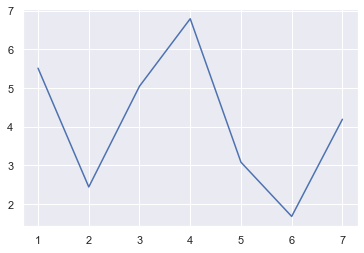

In [28]:
plt.plot(day_of_week) # Strongly affected by day of week

In [29]:
num_cols = df0.select_dtypes('number').columns
num_cols

Index(['YEAR', 'QUARTER', 'MONTH', 'DAY_OF_MONTH', 'DAY_OF_WEEK', 'DEP_DELAY',
       'DEP_DELAY_NEW', 'DEP_DEL15', 'TAXI_OUT', 'TAXI_IN', 'ARR_DELAY',
       'ARR_DELAY_NEW', 'ARR_DEL15', 'CANCELLED', 'DIVERTED', 'AIR_TIME',
       'FLIGHTS', 'DISTANCE', 'CARRIER_DELAY', 'WEATHER_DELAY', 'NAS_DELAY',
       'SECURITY_DELAY', 'LATE_AIRCRAFT_DELAY', 'DIV_ARR_DELAY',
       'DIV_DISTANCE'],
      dtype='object')

# !!!! Hacer bins de ARR DELAY cada 3 min (por ejemplo) y agrupar respecto a eso

In [30]:
# for i, num_col in enumerate(num_cols):
#     grp = df0.groupby([num_col])[['ARR_DELAY']].mean()
#     if i == 2:
#         break
# sns.barplot(grp)
# # grp

___

# 4. Model the data

### 4.1. Standadization
[All about Feature Scaling](https://towardsdatascience.com/all-about-feature-scaling-bcc0ad75cb35)

Algorithms that **do not require normalization/scaling** are the ones that **rely on rules**. They would not be affected by any monotonic transformations of the variables. Scaling is a monotonic transformation. Examples of algorithms in this category are:
- All the tree-based algorithms — **CART, Random Forests, Gradient Boosted Decision Trees** → These algorithms utilize rules (series of inequalities) and do not require normalization.
- Algorithms like **Linear Discriminant Analysis(LDA)** → Naive Bayes is by design equipped to handle this and give weights to the features accordingly. Performing features scaling in these algorithms may not have much effect.

Few key points to note:
- Mean centering does not affect the covariance matrix
- Scaling of variables does affect the covariance matrix
- Standardizing affects the covariance

Ways to do Feature Scaling:
- Min Max Scaler
    - We can set the range like [0,1] or [0,5] or [-1,1].
    - This Scaler responds well if the standard deviation is small and when a distribution is **not Gaussian**. This Scaler is **sensitive to outliers**.
- Standard Scaler
    - The Standard Scaler assumes data is **normally distributed** within each feature and scales them such that the distribution **centered around 0**, with a **standard deviation of 1**.
    - If data is not normally distributed, this is not the best Scaler to use.
- Max Abs Scaler
    - Scale each feature by its maximum absolute value. This estimator scales and translates each feature individually such that the **maximal absolute value of each feature in the training set is 1.0**. It does not shift/center the data and thus does not destroy any **sparsity**.
    - On positive-only data, this Scaler behaves similarly to Min Max Scaler.
- Robust Scaler
    - **Robust to outliers**
- Quantile Transformer Scaler
- Power Transformer Scaler
- Unit Vector Scaler

In [31]:
X = df0[num_cols].drop('ARR_DELAY', axis=1).head(500)
X

,YEAR,QUARTER,MONTH,DAY_OF_MONTH,DAY_OF_WEEK,DEP_DELAY,DEP_DELAY_NEW,DEP_DEL15,TAXI_OUT,TAXI_IN,ARR_DELAY_NEW,ARR_DEL15,CANCELLED,DIVERTED,AIR_TIME,FLIGHTS,DISTANCE,CARRIER_DELAY,WEATHER_DELAY,NAS_DELAY,SECURITY_DELAY,LATE_AIRCRAFT_DELAY,DIV_ARR_DELAY,DIV_DISTANCE
0,2019,1,1,3,4,25.0,25.0,1.0,30.0,4.0,25.0,1.0,0.0,0.0,36.0,1.0,152.0,0.0,0.0,0.0,0.0,25.0,0.0,0.0
1,2019,1,1,4,5,70.0,70.0,1.0,35.0,9.0,82.0,1.0,0.0,0.0,38.0,1.0,152.0,0.0,0.0,12.0,0.0,70.0,0.0,0.0
2,2019,1,1,5,6,6.0,6.0,0.0,20.0,3.0,0.0,0.0,0.0,0.0,84.0,1.0,563.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,2019,1,1,6,7,-5.0,0.0,0.0,16.0,3.0,0.0,0.0,0.0,0.0,85.0,1.0,563.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,2019,1,1,7,1,-3.0,0.0,0.0,25.0,4.0,0.0,0.0,0.0,0.0,88.0,1.0,563.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,2019,1,1,8,2,-5.0,0.0,0.0,13.0,10.0,0.0,0.0,0.0,0.0,63.0,1.0,301.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
502,2019,1,1,9,3,-14.0,0.0,0.0,41.0,9.0,4.0,0.0,0.0,0.0,68.0,1.0,301.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
503,2019,1,1,10,4,6.0,6.0,0.0,30.0,6.0,5.0,0.0,0.0,0.0,63.0,1.0,301.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
504,2019,1,1,11,5,97.0,97.0,1.0,9.0,8.0,65.0,1.0,0.0,0.0,51.0,1.0,301.0,0.0,0.0,0.0,0.0,65.0,0.0,0.0


In [52]:
y = df0['ARR_DELAY'].head(500)
# y = df0['ARR_DEL15'].head(500)
y

0      25.0
1      82.0
2      -8.0
3     -24.0
4      -9.0
       ... 
501   -19.0
502     4.0
503     5.0
504    65.0
505    -5.0
Name: ARR_DELAY, Length: 500, dtype: float64

<AxesSubplot:xlabel='DAY_OF_WEEK', ylabel='ARR_DELAY'>

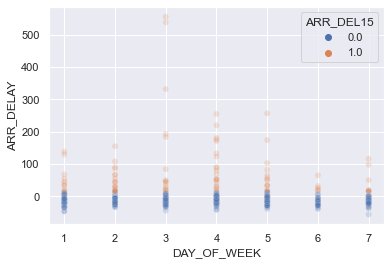

In [41]:
sns.scatterplot(x=X.columns[4],
                y=y,
                data=df0,
                hue='ARR_DEL15',
                alpha=0.2)

(-50.0, 100.0)

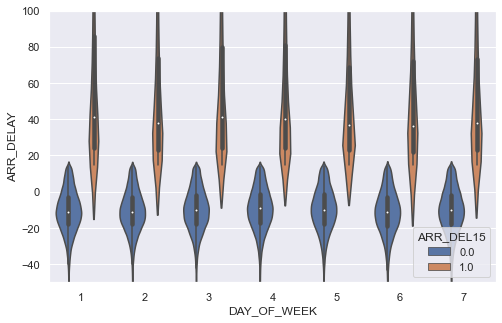

In [49]:
fig, ax = plt.subplots(figsize=(8,5))
sns.violinplot(x=X.columns[4],
                y=y.name,
                data=df0,
                hue='ARR_DEL15',
                ax=ax)

ax.set_ylim(-50, 100)

In [62]:
from sklearn.linear_model import LogisticRegression, LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler

In [63]:
%load_ext memory_profiler

The memory_profiler extension is already loaded. To reload it, use:
  %reload_ext memory_profiler


In [64]:
%memit

peak memory: 1005.98 MiB, increment: 0.00 MiB


In [74]:
%%time

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

pipe = make_pipeline(LinearRegression())
# pipe = make_pipeline(StandardScaler(), LinearRegression())
# pipe = make_pipeline(RandomForestRegressor())

pipe.fit(X_train, y_train)  # apply scaling on training data
# Pipeline(steps=[('standardscaler', StandardScaler()),
#                 ('logisticregression', LogisticRegression())])

Wall time: 9.99 ms


Pipeline(steps=[('linearregression', LinearRegression())])

In [61]:
# LinearRegression
pipe.score(X_test, y_test)  # apply scaling on testing data, without leaking training data.

0.9588497794996584

In [68]:
# StandardScaler(), LinearRegression()
pipe.score(X_test, y_test)  # apply scaling on testing data, without leaking training data.

0.9588497794996582

In [71]:
# RandomForestRegressor()
pipe.score(X_test, y_test)  # apply scaling on testing data, without leaking training data.

0.9553626083975846

In [77]:
results = pd.DataFrame({'y_test' : y_test,
                        'predictions' : pipe.predict(X_test)})
results

,y_test,predictions
365,-13.0,-24.208035
75,50.0,47.438381
378,-20.0,-20.548787
158,-6.0,-8.124243
106,-5.0,-10.977166
...,...,...
223,-17.0,-14.234883
179,-9.0,-24.304875
324,3.0,6.064753
156,34.0,37.012472


In [ ]:
%memit

In [ ]:
%memit

# 5. Communicate and visualize the results

___